

# Проект по теме "Принятие решений в бизнесе".

Описание проекта: Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.
Работа будет состоять из двух частей:
1) Приоритизация гипотез,где применю фреймворки ICE и RICE и посмотрю как изменятся приоритеты. 
2) Анализ A/B-теста,где исследую данные между группами,выявлю аномалии,определю статистическую значимость между группами по сырым и очищенным данным,а так же приму решение по результатам теста.


# Часть 1. Приоритизация гипотез.

In [ ]:
# импортирую необходимые библиотеки 
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.options.display.max_colwidth = 150

In [ ]:
# откроют датасет и взгляну на него
data = pd.read_csv('NDA link')
display(data.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [ ]:
# переименую столбцы для удобства
data.columns = data.columns.str.lower().str.replace(' ', '_')
display(data.head())

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [ ]:
# применю фреймворк ICE для приоритизации гипотез. 
data['ICE'] = (data['impact']*data['confidence'])/data['efforts']
data['ICE'] = round(data['ICE'],2)
display(data[['hypothesis','ICE']].sort_values(by = 'ICE',ascending = False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


*Топ 5 гипотез с id: 8,0,7,6,2. Их 'вес' невероятно большой,в сравнении с остальными гипотезами. Гипотеза получившая наибольший приоритет - "Запустить акцию, дающую скидку на товар в день рождения" с весом ICE 16.2*



In [ ]:
# применю фреймворк RICE для приоритизации гипотез. 
data['RICE'] = (data['reach']*data['impact']*data['confidence'])/data['efforts']

display(data[['hypothesis','RICE']].sort_values(by='RICE',ascending = False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


*Топ 5 гипотез с id: 7,2,0,6,8. Их 'вес' так же ощутимо больше,чем у остальных гипотез. Топ гипотез остался тем же,но изменился их приоритет. Топ гипотеза в RICE - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" c весом 112.*

In [ ]:
#  Исследую какой был параметр reach при методике RICE.
display(data.loc[data.index & [7,2,0,6,8]]);


/tmp/ipykernel_122/1483439959.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  display(data.loc[data.index & [7,2,0,6,8]]);


,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


*Приоритетные гипотезы при применение RICE остались теми же,но изменилось их положение относительно методики ICE. Это связано с тем,что в RICE используется дополнительный аргумент охвата,который у первой гипотезы самый большой (10) и далее убывает,из-за этого изменился приоритет в RICE.*

# Часть 2. Анализ A/B-теста

In [ ]:
# открою датасеты
orders = pd.read_csv('NDA link')
visitors = pd.read_csv('NDA link')

In [ ]:
# посмотрю на датасеты
display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
# приведу формат даты к необходимому

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%M-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%M-%d')
)

In [ ]:
# Исследую данные на пропуски\дубликаты
orders.info();
print('\n')
visitors.info();
print('\n')
print('дубликатов в заказах: ',orders.duplicated().sum());
print('\n')
print('дубликатов в посетителях: ',visitors.duplicated().sum());
print('\n')
print('Всего групп в тесте: ',visitors['group'].unique());


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


дубликатов в заказах:  0


дубликатов в посетителях:  0


Всег

Пропусков и явных дубликатов нет. В тесте учавствуют две группы.

In [ ]:
# Исследую дату начала и окончания теста в группах,а так же количество посетителей.
print('Дата старта группы А: ',min(visitors[visitors['group'] == 'A']['date']))
print('Дата окончания группы А: ',max(visitors[visitors['group'] == 'A']['date']))
print('Дата старта группы B: ',min(visitors[visitors['group'] == 'B']['date']))
print('Дата окончания группы B: ',max(visitors[visitors['group'] == 'B']['date']))
print('\n')
print('Количество посетителей в группе А',visitors[visitors['group'] == 'A']['visitors'].sum())
print('Количество посетителей в группе В',visitors[visitors['group'] == 'B']['visitors'].sum())

Дата старта группы А:  2019-01-01 00:08:00
Дата окончания группы А:  2019-01-31 00:08:00
Дата старта группы B:  2019-01-01 00:08:00
Дата окончания группы B:  2019-01-31 00:08:00


Количество посетителей в группе А 18736
Количество посетителей в группе В 18916


Даты совпадают. Разница в количестве посетителей в группах не существенна.

In [ ]:
# посмотрю не перемешались ли пользователи
usersA = orders.query('group == "A"')['visitorId'].drop_duplicates()
usersB = orders.query('group == "B"')['visitorId'].drop_duplicates()
inner_users = pd.DataFrame.merge(usersA,usersB,how = 'inner',on = 'visitorId')
print('Пользователей,попавших в обе группы: ', inner_users.count());

#print(orders[~orders['visitorId'].isin(inner_users['visitorId'])]['visitorId'].count())
orders = orders[~orders['visitorId'].isin(inner_users['visitorId'])]


Пользователей,попавших в обе группы:  visitorId    58
dtype: int64


58 пользователей попали в обе группы.. Можно их удалить,но т.к данные по посещениям уже сагрегированны,то получим искажения. С другой стороны,если этих пользователей не исключить,тоже получим искажения. Решаю исключить данных пользователей из дальнейшего анализа.

In [ ]:
# чисто для себя хочу исследовать нормальность распределения данных

alpha = 0.05  # критический уровень статистической значимости

results = stats.shapiro(orders['revenue'])
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [ ]:
# создам датафрейм с датами и группой.
datesGroups = orders[['date', 'group']].drop_duplicates()

In [ ]:
# агрегирую заказы

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])


In [ ]:
# агрегирую посетителей

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [ ]:
# соберу кумулятивные данные вместе

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

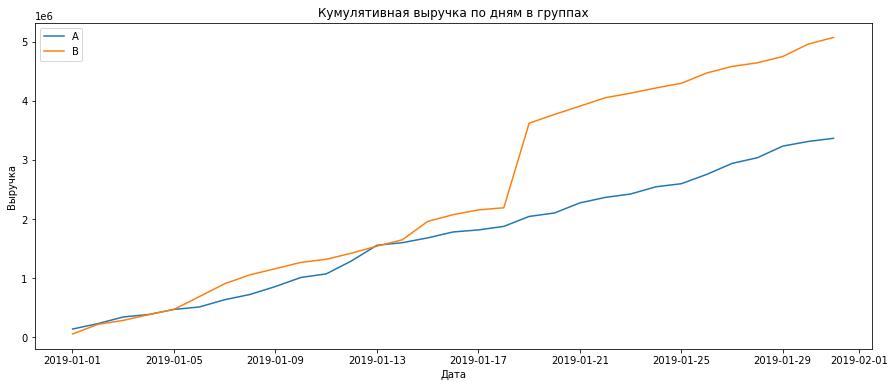

In [ ]:
# строю графики

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 6))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка по дням в группах')
plt.legend(); 



Видно аномальный скачок в группе B. Нужно вернуться к этому графику после удаления выбросов.

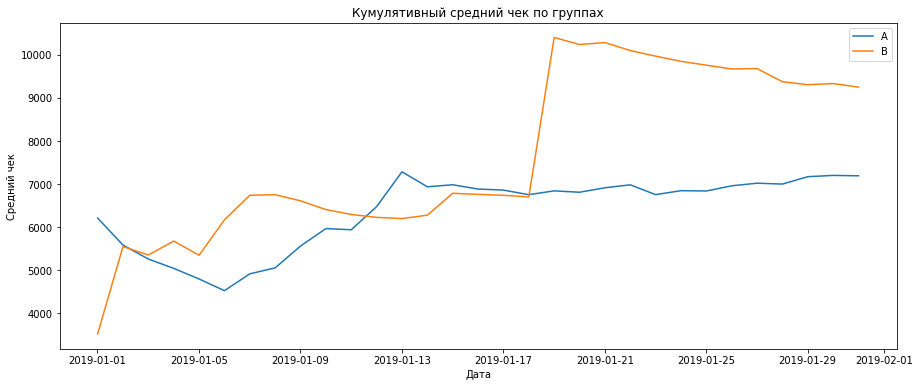

In [ ]:
# строю графики
plt.figure(figsize=(15, 6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')


plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Кумулятивный средний чек по группах')
plt.legend(); 

Видно аномальный скачок в группе B,из-за которого делать какие-либо выводы пока рано.

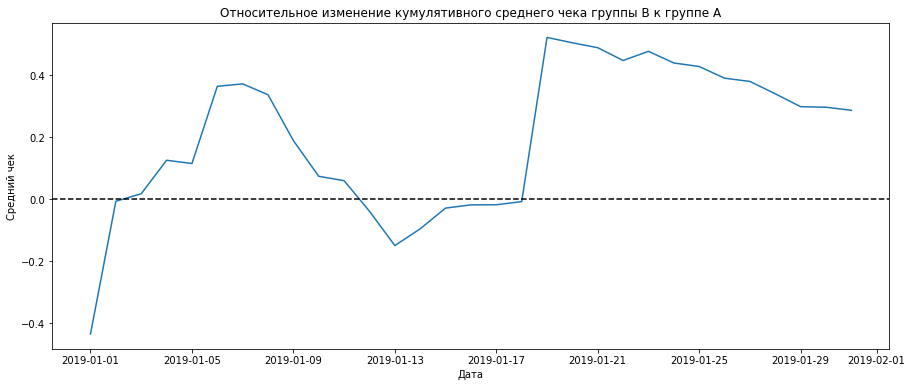

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# строю графики
plt.figure(figsize=(15, 6))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Относительноe изменениe кумулятивного среднего чека группы B к группе A');

Так же видно аномально резкие изменения в ту же дату.

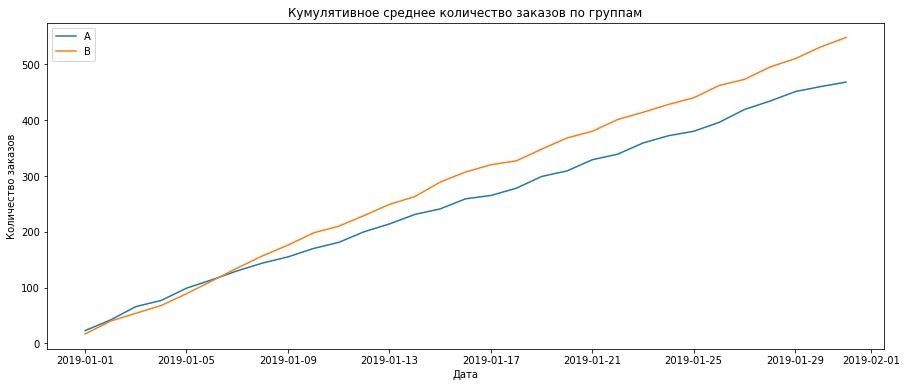

In [ ]:

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['orders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.title('Кумулятивное среднее количество заказов по группам')
plt.legend();

Количество заказов группы В выше контрольной группы.

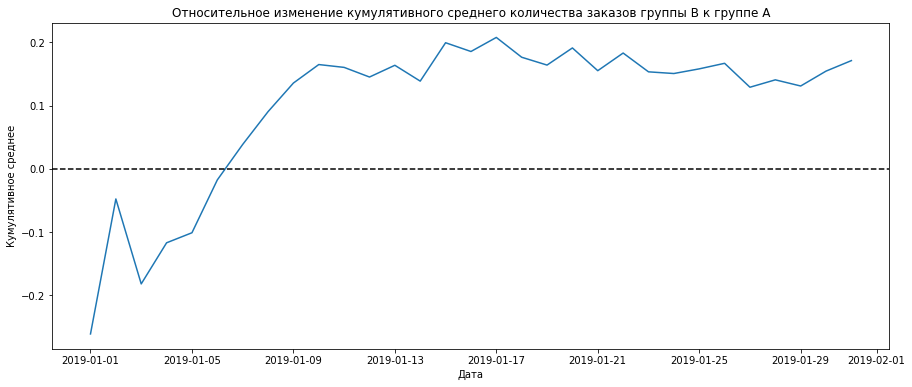

In [ ]:
# строю графики
mergedCumulativeOrders = cumulativeDataA[['date','orders']].merge(cumulativeDataB[['date','orders']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 6))

plt.plot(mergedCumulativeOrders['date'], mergedCumulativeOrders['ordersB']/mergedCumulativeOrders['ordersA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее')
plt.title('Относительное изменение кумулятивного среднего количества заказов группы B к группе A');

Группа В показывает прирост порядка 15%

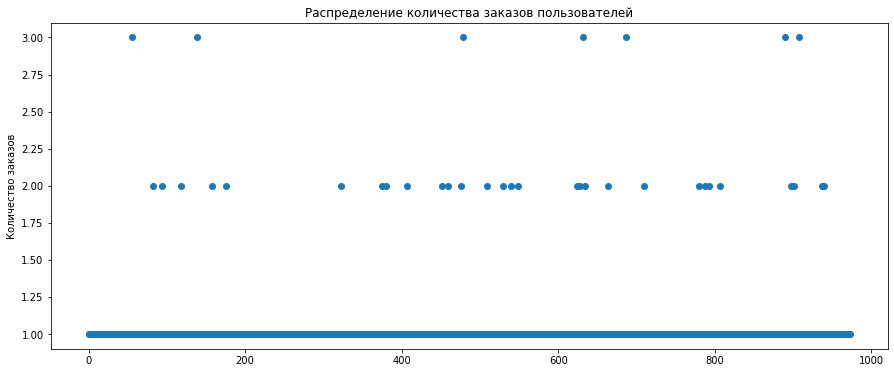

In [ ]:
# агрегирую данные
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0, len(ordersByUsers['orders'])))

# построю график
plt.figure(figsize=(15, 6))
plt.scatter(x_values,ordersByUsers['orders'] )
plt.ylabel('Количество заказов')
plt.title('Распределение количества заказов пользователей'); 

Редко кто делает больше 2 заказов.

In [ ]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

# буду далее использовать эту переменную
orders99 = np.percentile(ordersByUsers['orders'], [95, 99])[1]


[1. 2.]


Буду отбрасывать 99 процентиль.

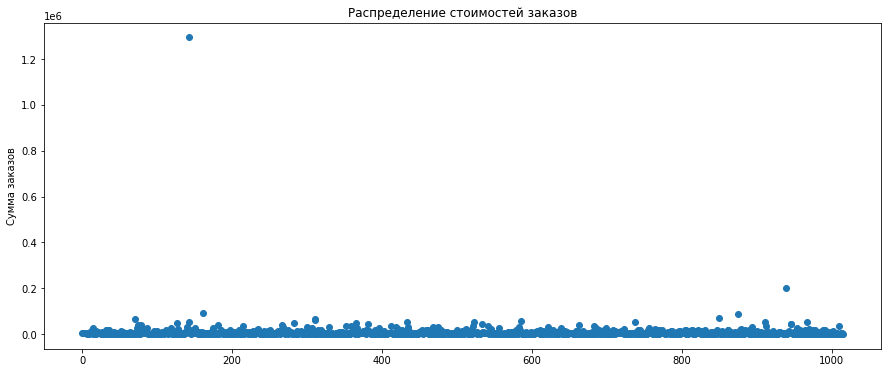

In [ ]:
# агрегирую данные
ordersByUsers = (
    orders.groupby('transactionId', as_index=False)
    .agg({'revenue': 'sum'})
)
ordersByUsers.columns = ['userId', 'revenue']

x_values = pd.Series(range(0, len(ordersByUsers['revenue'])))

# построю график
plt.figure(figsize=(15, 6))
plt.scatter(x_values,ordersByUsers['revenue'] )
plt.ylabel('Cумма заказов')
plt.title('Распределение стоимостей заказов'); 

Очень шумно,есть аномально большие суммы. Построю еще один график для более точного анализа.

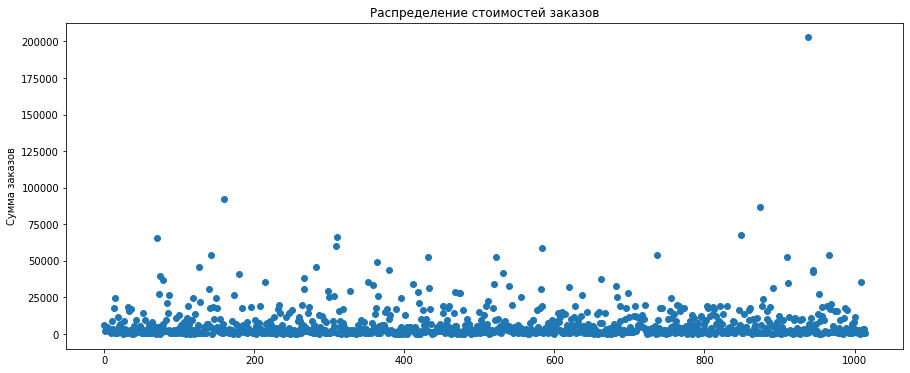

In [ ]:
x_values = pd.Series(range(0, len(ordersByUsers.query('revenue < 400000')['revenue'])))

# построю график
plt.figure(figsize=(15, 6))
plt.scatter(x_values,ordersByUsers.query('revenue < 400000')['revenue'] )
plt.ylabel('Cумма заказов')
plt.title('Распределение стоимостей заказов'); 

Заказов больше 75.000 мало. Посмотрю на процентиль.

In [ ]:
print(np.percentile(ordersByUsers['revenue'], [95, 99])) 

# буду далее использовать эту переменную
revenue99 = np.percentile(ordersByUsers['revenue'], [95, 99])[1]

[26785. 53904.]


Буду отбрасывать 99 процентиль.


Нулевая гипотеза - различий в среднем количестве заков между группами нет.

Альтернативная: различия в среднем количестве заков между группами есть.

In [ ]:
# соберу количество посетителей в день. будет далее необходимо для рассчетов
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# соберу число заказов пользователями
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

# подготовлю выборки к проверке критерием Манна-Уитни

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

pval = round(stats.mannwhitneyu(sampleA, sampleB)[1],3)

if pval < 0.05 :
  print('p-value:',pval,' Обнаружены статистически значимые различия')
else:
  print('p-value:',pval,' Статистически значимые различия не обнаружены')

print('Отноительная разница:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011  Обнаружены статистически значимые различия
Отноительная разница: 0.160


Обнаружены статистически значимые различия,отвергаем нулевую гипотезу. Группа В опережает контрольную группу в среднем на 16%. Группа В лучше себя показала. 



Нулевая гипотеза - различий в среднем чеке заказа между группами нет.

Альтернативная: различия в среднем чеке заказа между группами есть.

In [ ]:

pval = round(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1],3)

if pval < 0.05 :
  print('p-value:',pval,' Обнаружены статистически значимые различия')
else:
  print('p-value:',pval,' Статистически значимые различия не обнаружены')

print('Отноительная разница:',"{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829  Статистически значимые различия не обнаружены
Отноительная разница: 0.287


Cтатистически значимые различия не обнаружены, нулевая гипотеза верна.


Нулевая гипотеза - различий в среднем количестве заказов между группами по «очищенным» данным нет.

Альтернативная: различия в среднем количестве заказов между группами по «очищенным» данным есть.

In [ ]:
# очищу данные 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders99]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders99]['userId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > revenue99]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)


In [ ]:
# соберу отфильтрованные данные
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

pval = round(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1],3)

if pval < 0.05 :
  print('p-value:',pval,' Обнаружены статистически значимые различия')
else:
  print('p-value:',pval,' Статистически значимые различия не обнаружены')

print('Отноительная разница:',"{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.007  Обнаружены статистически значимые различия
Отноительная разница: 0.189


Обнаружены статистически значимые различия,отвергаем нулевую гипотезу. После удаления аномалий группа В все так же лучше показывает себя по количеству заказов с опережением на 19%



Нулевая гипотеза - различий в среднем чеке заказа между группами по «очищенным» данным нет.

Альтернативная: различия в среднем чеке заказа между группами по «очищенным» данным есть.

In [ ]:

pval=        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]

if pval < 0.05 :
  print('p-value:',pval,' Обнаружены статистически значимые различия')
else:
  print('p-value:',pval,' Статистически значимые различия не обнаружены')


print('Отноительная разница:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.7877044862440841  Статистически значимые различия не обнаружены
Отноительная разница: -0.032


Статистически значимые различия не обнаружены,нулевая гипотеза верна. 

# Вывод.
Необходимо остановить тест и зафиксировать победу группы В.

Про качество данных: в данных не было пропусков иди дубликатов,но по технической неполадке при проведении теста или сбора данных 58 пользователей оказались в обеих группах,что вносило свои аномалии и искажения (например в количестве заказов). Такие пользователи были исключены из анализа на начальном этапе. Необходимо исследовать причину появления таких пользователей.

Причины для остановки теста и победы группы B:

1. По сырым данным группа B выигрывает в количестве заказов на 16%, были обнаружены статистически значимые различия.
2. По сырым данным между группами в среднем чеке заказа не было обнаружено статистически значимых различий.
3. После удаления аномалий группа B выигрывает в среднем количестве заказов. С приростом в 18,9%.
4. После удаления аномалий статистически значемого различия в среднем чеке заказа между группами не обнаружено. 

В группе B пользователи чаще делают заказы. В теории,это увеличит LTV пользователей,а магазин продаст больше товара. 

In [ ]:
# исследую конверсию в группах
display('Конверсия группы А',100*cumulativeDataA['buyers'].iat[-1]/cumulativeDataA['visitors'].iat[-1])
display('Конверсия группы B',100*cumulativeDataB['buyers'].iat[-1]/cumulativeDataB['visitors'].iat[-1])

'Конверсия группы А'

2.3751067463706232

'Конверсия группы B'

2.7912877986889404

Конверсия группы В так же выше,поэтому с учетом предыдущих исследований тест стоит остановить и признать успешным.